In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [13]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [14]:
df.shape

(550, 7)

In [ ]:
# Про скільки книг зберігає дані датасет? Відповідь: 550

In [16]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [17]:
# Первинне дослідження даних

In [18]:
# Чи є в якихось змінних пропуски? (Так / ні) 
# Відповідь: ні
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [28]:
#  Які є унікальні жанри?
# Відповідь: Non Fiction, Fiction
pd.unique(df["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)

<Axes: title={'center': 'Price Frequency'}, ylabel='Frequency'>

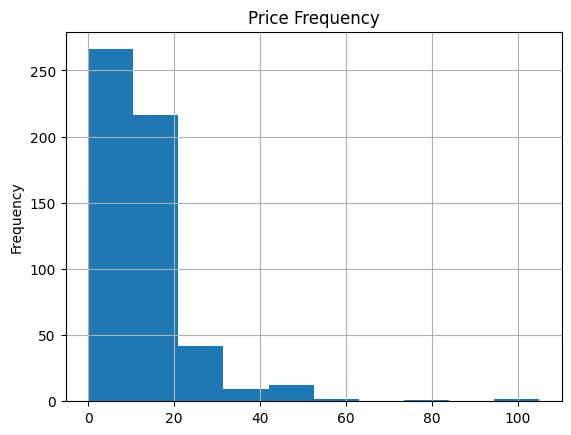

In [29]:
df["price"].plot(kind="hist", title="Price Frequency", grid=True)

In [30]:
# Максимальна ціна? Відповідь: 105
# Мінімальна ціна? Відповідь: 0
# Середня ціна? Відповідь: 13.1
# Медіанна ціна? Відповідь: 11
prices = df["price"]
max_price = prices.max()
min_price = prices.min()
mean_price = prices.mean()
median_price = prices.median()

In [34]:
print(max_price)
print(min_price) 
print(mean_price)
print(median_price)

105
0
13.1
11.0


In [35]:
# Пошук та сортування даних

In [38]:
# Який рейтинг у датасеті найвищий? Відповідь: 4.9
highest_rating = df["user_rating"].max()
highest_rating

4.9

In [39]:
# Скільки книг мають такий рейтинг? Відповідь: 52
quantity_books_df = df[df["user_rating"] >= highest_rating]
quantity = quantity_books_df["name"].count()
quantity

52

In [42]:
# Яка книга має найбільше відгуків? Відповідь: 534    Where the Crawdads Sing
most_revs_book = df[df["reviews"] == df["reviews"].max()]["name"]
most_revs_book

534    Where the Crawdads Sing
Name: name, dtype: object

In [44]:
#  З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
# Відповідь: 174    Humans of New York : Stories
top_50_2015 = (
    df.sort_values(by="user_rating", ascending=False).head(50).loc[(df["year"] == 2015)]
)
most_exp_book_2015 = top_50_2015[
    top_50_2015["price"] == top_50_2015["price"].max()
].name
most_exp_book_2015 

174    Humans of New York : Stories
Name: name, dtype: object

In [47]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
# Відповідь: 2
fiction_book_2010 = len(
    df.sort_values(by="reviews", ascending=False)
    .head(50)
    .loc[((df["year"] == 2010) & (df["genre"] == "Fiction"))]
)
fiction_book_2010

2

In [48]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
# Відповідь: 1
rate_books = df[
    (df["year"] == 2011) & (df["user_rating"] == 4.9)
    | (df["year"] == 2010) & (df["user_rating"] == 4.9)
]
rate_books

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [49]:
# Яка книга остання у відсортованому списку? Відповідь: 253    Old School (Diary of a Wimpy Kid #10)
books_2015 = df[df["year"] == 2015].sort_values(by="price", ascending=True)
cheap_books_2015 = books_2015[(books_2015["price"] < 8)]
searching_book = cheap_books_2015.tail(1).name
searching_book


253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

In [ ]:
# Агрегування даних та з'єднання таблиць

In [51]:
# Максимальна ціна для жанру Fiction: Відповідь: 82
# Мінімальна ціна для жанру Fiction: Відповідь: 0
# Максимальна ціна для жанру Non Fiction: Відповідь: 105
# Мінімальна ціна для жанру Non Fiction: Відповідь: 0 
gr_price = df.groupby("genre")["price"].agg(["min", "max"])
gr_price

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [53]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
df = df.drop_duplicates(subset=["name"])
books = df.groupby(["author"], group_keys=False)["name"].count()
books.sort_values(ascending=True).tail(1)
df_1 = pd.DataFrame(books)

In [ ]:
# Якої розмірності вийшла таблиця? Відповідь: (248, 1)
# Який автор має найбільше книг? Відповідь: Jeff Kinney   
# Скільки книг цього автора? Відповідь: 12


In [54]:
df_1.shape

(248, 1)

In [55]:
books.sort_values(ascending=True).tail(1)

author
Jeff Kinney    12
Name: name, dtype: int64

In [56]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
mean_rating = df.groupby(["author"], group_keys=False)["user_rating"].agg("mean")
mean_rating.sort_values(ascending=False).tail(1)
df_2 = pd.DataFrame(mean_rating)

In [ ]:
# У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt 
# Який у цього автора середній рейтинг? Відповідь: 3.9

In [57]:
mean_rating.sort_values(ascending=False).tail(1)

author
Donna Tartt    3.9
Name: user_rating, dtype: float64

In [59]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
df_3 = pd.concat([df_1, df_2], axis=1)
df_3

,name,user_rating
author,,
Abraham Verghese,1,4.60
Adam Gasiewski,1,4.40
Adam Mansbach,1,4.80
Adir Levy,1,4.80
Admiral William H. McRaven,1,4.70
...,...,...
Walter Isaacson,2,4.55
William Davis,1,4.40
William P. Young,1,4.60


In [60]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом 
# Відповідь: Який автор перший у списку?  Donna Tartt 
df_3.sort_values(by=["name", "user_rating"], ascending=True)


,name,user_rating
author,,
Donna Tartt,1,3.900000
Gallup,1,4.000000
Gillian Flynn,1,4.000000
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


In [66]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


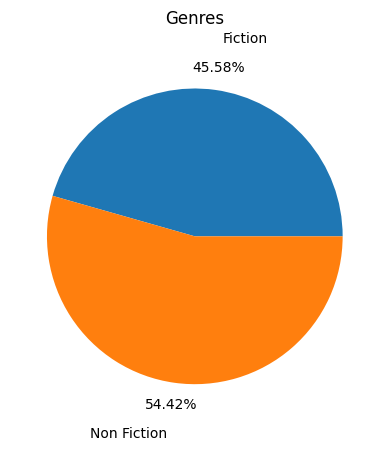

In [72]:
# Table 1
genres = df.groupby(["genre"])["genre"].count()
data = genres.values
labels = genres.index
plt.title("Genres", pad=20)
plt.pie(
    data,
    labels=labels,
    shadow=False,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)


plt.show()

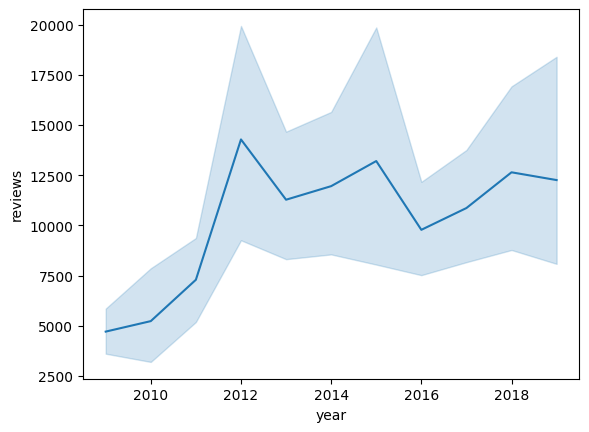

In [100]:
# Table 2
sns.lineplot(x='year', y='reviews', data=df);

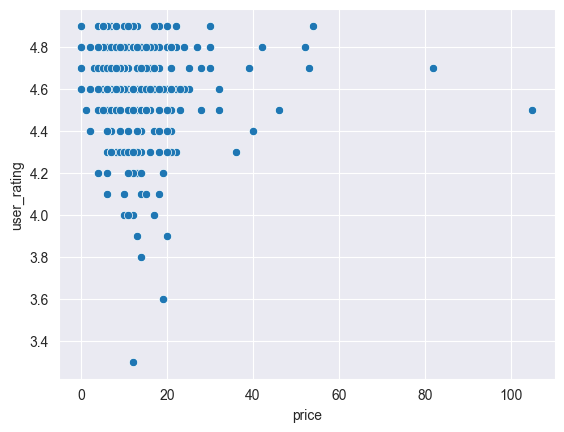

In [102]:
# Table 3 
sns.set_style("darkgrid")
sns.scatterplot(x='price', y='user_rating', data=df);